# **КУРСОВАЯ ПО ПРЕДМЕТУ: ИРФМ. ВАРИАНТ 6**

# **1 пункт**

In [ ]:
import requests
import re
import copy
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time

BASE_URL = 'https://www.consultant.ru'

def get_toc_links(main_url):
    try:
        response = requests.get(main_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        toc_block = soup.find('div', class_='document-page__toc')


        return [urljoin(BASE_URL, a['href']) for a in toc_block.find_all('a', href=True)]

    except Exception as e:
        print(f'Ошибка при получении оглавления: {e}')
        return []

def parse_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.find('title').get_text(strip=True) if soup.find('h1') else 'Без названия'

        print(title, "\n")

        content = soup.find('div', class_='document-page__content')

        text_parts = []
        for element in content.find_all(['p', 'div']):
            text = element.get_text(' ', strip=True)
            text_parts.append(re.sub(r'\s+', ' ', text))

        text = '\n'.join(text_parts)
        return f'\n\n{text}\n'

    except Exception as e:
        print(f'Ошибка при парсинге {url}: {e}')
        return ''


main_url = 'https://www.consultant.ru/document/cons_doc_LAW_144624/'

toc_links = get_toc_links(main_url)

full_text = []

for i, url in enumerate(toc_links, 1):
      full_text.append(parse_page(url))
      time.sleep(0.5)

with open('law_document_1step.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(full_text))




Глава 1. ОБЩИЕ ПОЛОЖЕНИЯ \ КонсультантПлюс 

Статья 1. Сфера применения настоящего Федерального закона \ КонсультантПлюс 

Статья 2. Законодательство Российской Федерации и иные нормативные правовые акты о контрактной системе в сфере закупок товаров, работ, услуг для обеспечения государственных и муниципальных нужд \ КонсультантПлюс 

Статья 3. Основные понятия, используемые в настоящем Федеральном законе \ КонсультантПлюс 

Статья 4. Информационное обеспечение контрактной системы в сфере закупок \ КонсультантПлюс 

Статья 5. Организация документооборота в контрактной системе в сфере закупок \ КонсультантПлюс 

Статья 6. Принципы контрактной системы в сфере закупок \ КонсультантПлюс 

Статья 7. Принципы открытости и прозрачности \ КонсультантПлюс 

Статья 8. Принцип обеспечения конкуренции \ КонсультантПлюс 

Статья 9. Принцип профессионализма заказчика \ КонсультантПлюс 

Статья 10. Принцип стимулирования инноваций \ КонсультантПлюс 

Статья 11. Принцип единства контрактной системы в 

# 2 пункт

In [ ]:
import re
def clean_text0(text):
    cleaned = re.sub(r'Глава 8[\s\S]*', '', text, flags=re.IGNORECASE)
    return cleaned

cleaned_text = clean_text0(''.join(full_text))
with open('law_document_2step.txt', 'w', encoding='utf-8') as file:
    file.write(cleaned_text)

# 3 пункт


In [ ]:
import re

def clean_text(text):

    # Удаляем структурные элементы
    cleaned = re.sub(r'^Глава \d+\..*$', '\n', text, flags=re.MULTILINE)
    cleaned = re.sub(r'^Статья \d+\..*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^Статьи \d+.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^[^а-яА-Я]*не применя[ею]тся.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^\(.*?\)$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^([^а-яА-Я-]+)', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^[а-я]\)\s?', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^Утратил.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^[^а-яА-Я]*[Уу]тратил.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)Перспективы[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)Готовые[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)Путеводитель[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)КонсультантПлюс[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    # cleaned = re.sub(r'\bрубл[яеёюийь]*\b|\bруб\b\.?', '', cleaned, flags=re.IGNORECASE)
    cleaned = re.sub(r'["«](.*?)["»]', '', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'[\d]+-ФЗ', '', cleaned, flags=re.MULTILINE)

    # Удаляем пустые строки и лишние пробелы
    cleaned = '\n'.join(line for line in cleaned.split('\n') if line.strip())
    cleaned = re.sub(r'\n{3,}', '\n\n', cleaned)

    return cleaned


cleaned_text1 = clean_text(''.join(cleaned_text))

with open('law_document_3step.txt', 'w', encoding='utf-8') as file:
    file.write(cleaned_text1)



# 4 пункт

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 63.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

nlp = spacy.load("ru_core_news_sm")

# Кастомная функция для токенизатора

def process_text(text):
    hyphen_pattern = re.compile(r"^\w+-\w+$")
    nlp.tokenizer.token_match = hyphen_pattern.match
    doc = nlp(text)

    # Собираем все именованные сущности, которые нужно исключить
    entities = {ent.text for ent in doc.ents if ent.label_ in
               ['PER', 'ORG', 'GPE', 'LOC', 'MONEY', 'NUM']}

    # Обработка токенов
    processed_tokens = []
    for token in doc:
        # Пропускаем стоп-слова, пунктуацию, пробелы и именованные сущности
        if (not token.is_stop
            and not token.is_punct
            and not token.is_space
            and token.text.lower() not in entities
            and token.lemma_.lower() not in entities
            and not token.like_num
            and not token.text == 'N'
            and not token.lemma_.lower() == 'рубль'
            and not token.lemma_.lower() == 'роскосмос'
            and not token.lemma_.lower() == 'росатом'

            # and not token.lemma_ == 'Cоединить'
            # and not token.lemma_.lower() == 'штат'
            # and not token.lemma_.lower() == 'америка'
            ):
            # Добавляем лемму в нижнем регистре
            processed_tokens.append(token.lemma_.lower())

    return processed_tokens

# Обработка текста
prepared_text = process_text(cleaned_text1)
copy = prepared_text.copy()

print("Обработанные токены (без имен, стран, организаций и стоп-слов):")
print(prepared_text[0:20])


with open('law_document_4step.txt', 'w', encoding='utf-8') as file:
    file.write(' '.join(prepared_text))

Обработанные токены (без имен, стран, организаций и стоп-слов):
['федеральный', 'закон', 'регулировать', 'отношение', 'направить', 'обеспечение', 'государственный', 'муниципальный', 'нужда', 'цель', 'повышение', 'эффективность', 'результативность', 'осуществление', 'закупка', 'товар', 'работа', 'услуга', 'обеспечение', 'гласность']


In [ ]:

i = 0
while i < len(prepared_text) - 2:
    if (prepared_text[i] == 'соединить' and
        prepared_text[i+1] == 'штат' and
        prepared_text[i+2] == 'америка'):
        del prepared_text[i:i+3]
    elif (prepared_text[i] == 'российский' and
        prepared_text[i+1] == 'федерация'):
        del prepared_text[i:i+2]
    else:
        i += 1

with open('law_document_4step.txt', 'w', encoding='utf-8') as file:
    file.write(' '.join(prepared_text))

# 5 пункт

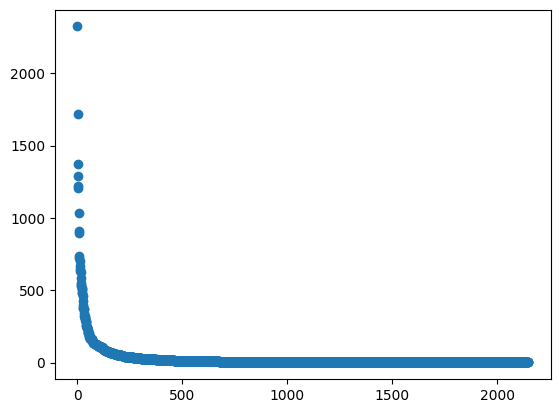

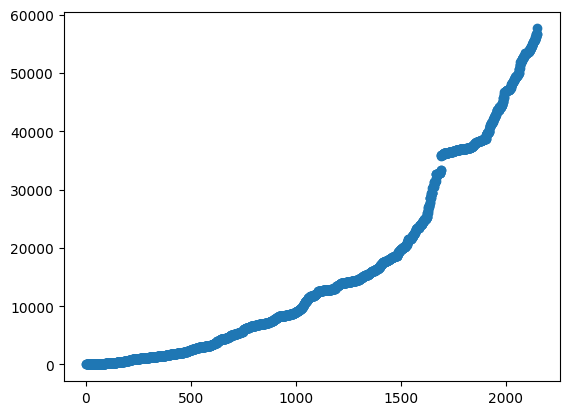

In [ ]:
import matplotlib.pyplot as plt
# Расчёт частот слов
words = {}
i= 0
words_counter= []
words_counter_x= []
words_counter_y= []
for token in prepared_text:
  if token in words:
    words[token] += 1
  else:
    words[token] = 1
  if not token in words_counter:
    words_counter.append(token)
    words_counter_x.append(len(words_counter))
    words_counter_y.append(i)
  i+= 1
points_y= sorted(list(words.values()), reverse = True)
points_x= list(range(0, len(points_y)))


plt.scatter(points_x, points_y)
plt.show()

plt.scatter(words_counter_x, words_counter_y)
plt.show()


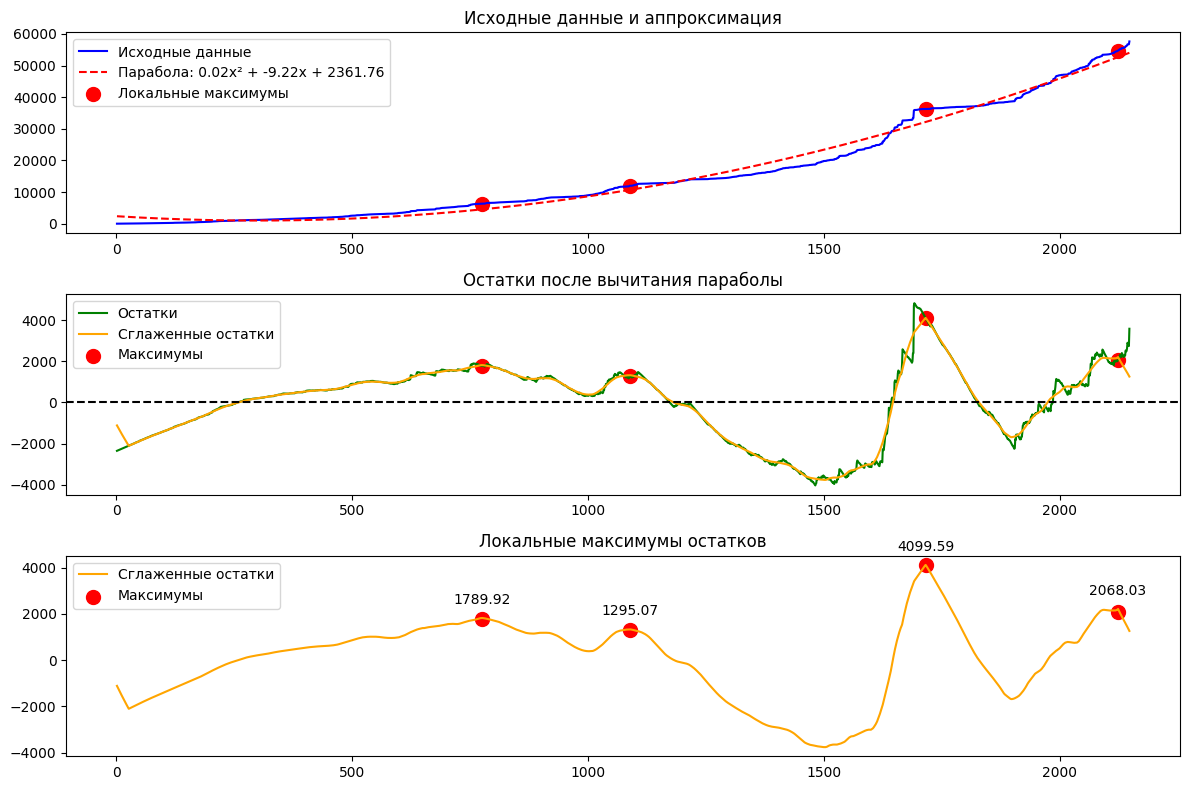

Параметры параболы (a, b, c): (np.float64(0.0154893378711355), np.float64(-9.220350192173434), np.float64(2361.7638098927914))

Обнаруженные локальные максимумы:
1. x=776.00, y=6324.00, residual=1789.92
2. x=1089.00, y=11985.00, residual=1295.07
3. x=1716.00, y=36250.00, residual=4099.59
4. x=2124.00, y=54724.00, residual=2068.03


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def parabola(x, a, b, c):
    """Функция параболы y = ax² + bx + c"""
    return a * x**2 + b * x + c

def find_local_maxima(x, y, window_size=5, prominence=0.1, visualize=True):
    """
    Находит локальные максимумы в остатках после удаления параболической составляющей

    Параметры:
    points - список кортежей (x, y)
    window_size - размер окна для сглаживания остатков
    prominence - минимальная значимость пика
    visualize - отображать графики
    """
    # Преобразуем точки в массивы numpy
    x = np.array(x)
    y = np.array(y)

    # 1. Аппроксимация параболой
    params, _ = curve_fit(parabola, x, y)
    a, b, c = params
    y_parabola = parabola(x, a, b, c)

    # 2. Вычисляем остатки
    residuals = y - y_parabola

    # 3. Сглаживаем остатки для устранения шума
    smoothed = np.convolve(residuals, np.ones(window_size)/window_size, mode='same')

    # 4. Находим локальные максимумы на сглаженных остатках
    peaks, properties = find_peaks(smoothed, prominence=prominence)

    # 5. Собираем информацию о пиках
    maxima = [(x[i], y[i], residuals[i]) for i in peaks]

    # Визуализация
    if visualize:
        plt.figure(figsize=(12, 8))

        # Исходные данные и парабола
        plt.subplot(3, 1, 1)
        plt.plot(x, y, 'b-', label='Исходные данные')
        plt.plot(x, y_parabola, 'r--', label=f'Парабола: {a:.2f}x² + {b:.2f}x + {c:.2f}')
        plt.scatter([p[0] for p in maxima], [p[1] for p in maxima],
                   color='red', s=100, label='Локальные максимумы')
        plt.title('Исходные данные и аппроксимация')
        plt.legend()

        # Остатки
        plt.subplot(3, 1, 2)
        plt.plot(x, residuals, 'g-', label='Остатки')
        plt.plot(x, smoothed, 'orange', label='Сглаженные остатки')
        plt.axhline(y=0, color='black', linestyle='--')
        plt.scatter([p[0] for p in maxima], [p[2] for p in maxima],
                   color='red', s=100, label='Максимумы')
        plt.title('Остатки после вычитания параболы')
        plt.legend()

        # Детальный вид остатков с максимумами
        plt.subplot(3, 1, 3)
        plt.plot(x, smoothed, 'orange', label='Сглаженные остатки')
        plt.scatter([p[0] for p in maxima], [p[2] for p in maxima],
                   color='red', s=100, label='Максимумы')
        for i in peaks:
            plt.annotate(f'{residuals[i]:.2f}', (x[i], smoothed[i]),
                        textcoords="offset points", xytext=(0,10), ha='center')
        plt.title('Локальные максимумы остатков')
        plt.legend()

        plt.tight_layout()
        plt.show()

    return {
        'parabola_params': (a, b, c),
        'residuals': residuals,
        'smoothed_residuals': smoothed,
        'local_maxima': maxima,
        'peak_indices': peaks
    }

# Пример использования с тестовыми данными
if __name__ == "__main__":
    # Генерация тестовых данных: парабола + шум + всплески

    # Анализ данных
    result = find_local_maxima(words_counter_x, words_counter_y, window_size=50, prominence=150)

    # Вывод результатов
    print("Параметры параболы (a, b, c):", result['parabola_params'])
    print("\nОбнаруженные локальные максимумы:")
    for i, peak in enumerate(result['local_maxima']):
        print(f"{i+1}. x={peak[0]:.2f}, y={peak[1]:.2f}, residual={peak[2]:.2f}")

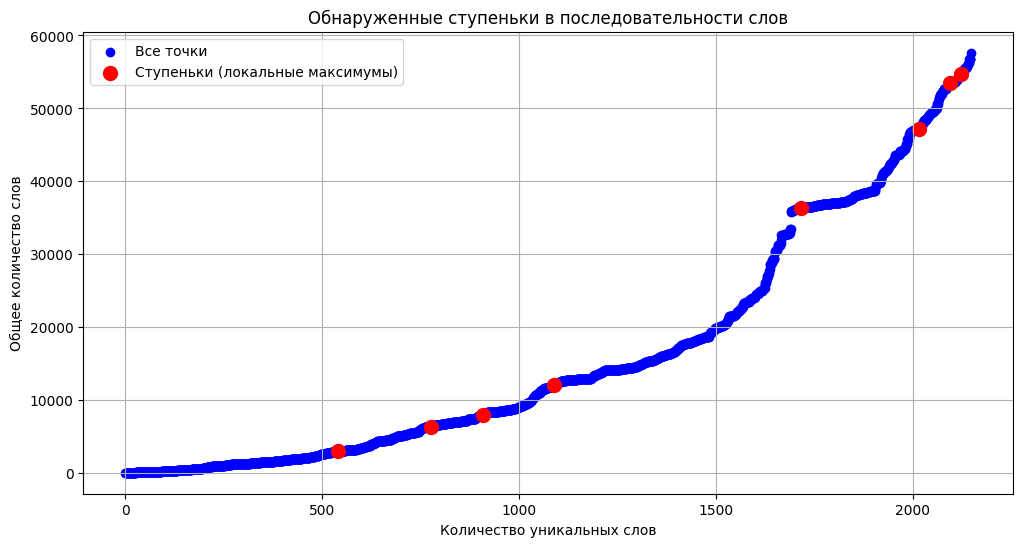

In [ ]:
# Раскраска ступенек на scatter plot words_counter_x и words_counter_y
plt.figure(figsize=(12, 6))
plt.scatter(words_counter_x, words_counter_y, c='blue', label='Все точки')

# Раскрашиваем точки, соответствующие локальным максимумам
maxima_x = [peak[0] for peak in result['local_maxima']]
maxima_y = [peak[1] for peak in result['local_maxima']]
plt.scatter(maxima_x, maxima_y, c='red', s=100, label='Ступеньки (локальные максимумы)')



plt.title('Обнаруженные ступеньки в последовательности слов')
plt.xlabel('Количество уникальных слов')
plt.ylabel('Общее количество слов')
plt.legend()
plt.grid(True)
plt.show()

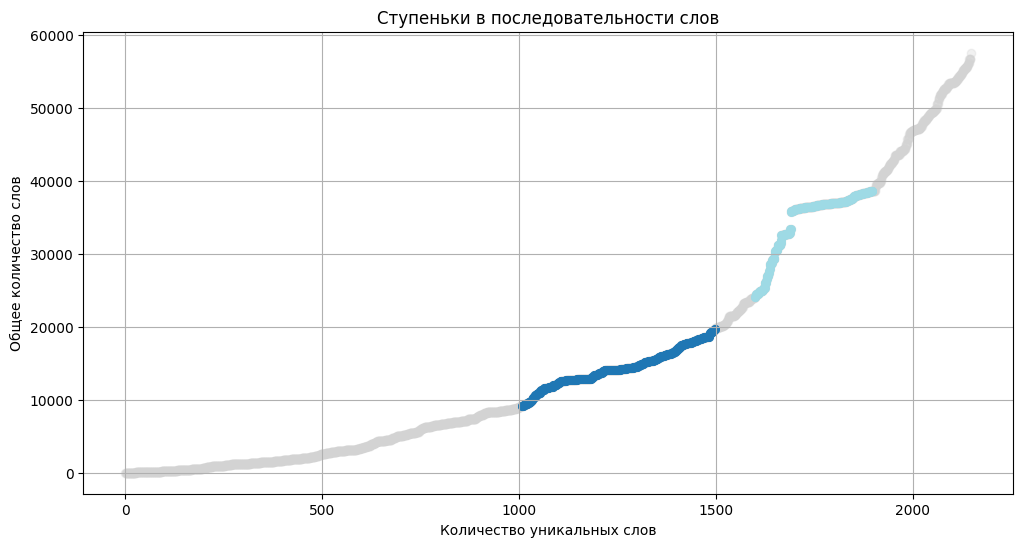

In [ ]:
# Находим границы ступенек
steps = []
for peak_idx in result['peak_indices']:
    # Начало ступеньки - где начинается резкий рост
    start_idx = peak_idx
    while start_idx > 0 and result['smoothed_residuals'][start_idx] - result['smoothed_residuals'][start_idx-1] > 0.5:
        start_idx -= 1

    # Конец ступеньки - где заканчивается резкое падение
    end_idx = peak_idx
    while end_idx < len(result['smoothed_residuals'])-1 and result['smoothed_residuals'][end_idx] - result['smoothed_residuals'][end_idx+1] > 0.5:
        end_idx += 1
    if end_idx - start_idx>250 :
        steps.append((start_idx, end_idx))

# Раскрашиваем ступеньки
plt.figure(figsize=(12, 6), dpi=100)
colors = plt.cm.tab20(np.linspace(0, 2, len(steps)))

# Сначала все точки серым
plt.scatter(words_counter_x, words_counter_y, c='lightgray', alpha=0.3)

# Затем раскрашиваем каждую ступеньку
for i, (start_idx, end_idx) in enumerate(steps):
    step_x = words_counter_x[start_idx:end_idx+1]
    step_y = words_counter_y[start_idx:end_idx+1]
    plt.scatter(step_x, step_y, c=[colors[i]], s=30)

plt.title('Ступеньки в последовательности слов')
plt.xlabel('Количество уникальных слов')
plt.ylabel('Общее количество слов')
plt.grid(True)
plt.show()

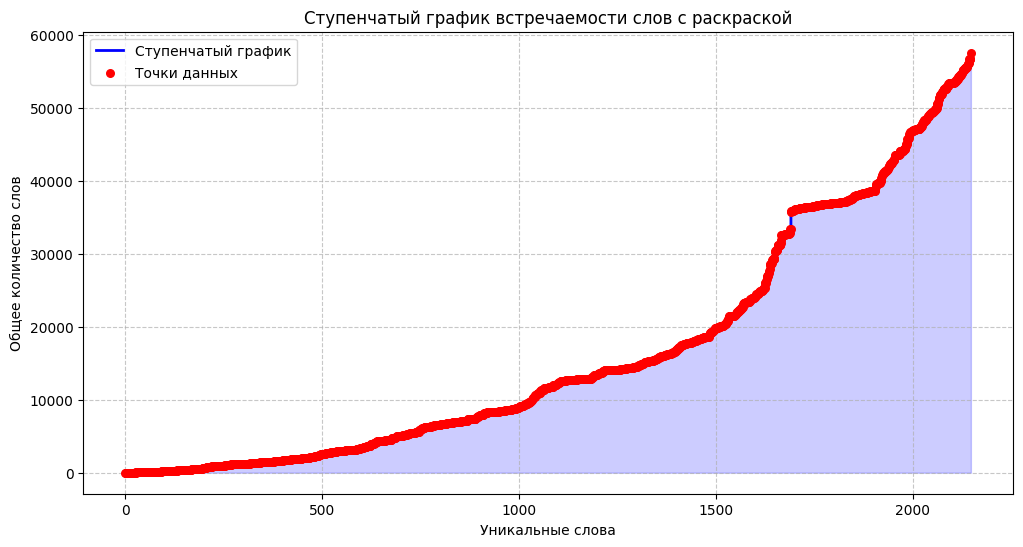

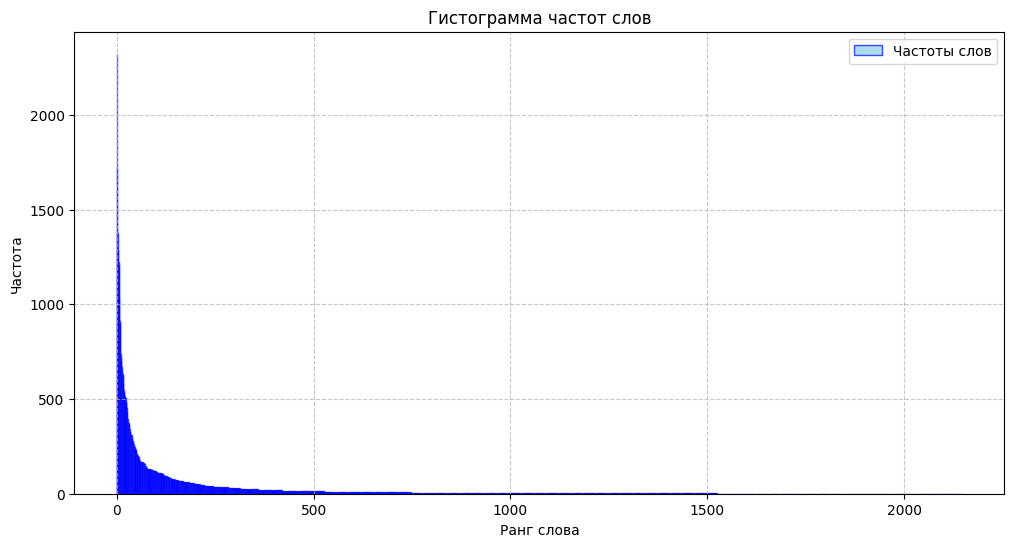

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

words = {}
i = 0
words_counter = []
words_counter_x = []
words_counter_y = []
for token in prepared_text:
    if token in words:
        words[token] += 1
    else:
        words[token] = 1
    if not token in words_counter:
        words_counter.append(token)
        words_counter_x.append(len(words_counter))
        words_counter_y.append(i)
    i += 1

# Создаем ступенчатый график с заливкой
plt.figure(figsize=(12, 6))
plt.step(words_counter_x, words_counter_y, where='post', color='blue', linewidth=2, label='Ступенчатый график')
plt.fill_between(words_counter_x, words_counter_y, step='post', alpha=0.2, color='blue')

# Добавляем точки на ступеньках
plt.scatter(words_counter_x, words_counter_y, color='red', s=30, zorder=3, label='Точки данных')

plt.title('Ступенчатый график встречаемости слов с раскраской')
plt.xlabel('Уникальные слова')
plt.ylabel('Общее количество слов')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# График частот слов (первый scatter plot) с заливкой
points_y = sorted(list(words.values()), reverse=True)
points_x = list(range(0, len(points_y)))

plt.figure(figsize=(12, 6))
plt.bar(points_x, points_y, color='skyblue', edgecolor='blue', alpha=0.7, label='Частоты слов')
plt.title('Гистограмма частот слов')
plt.xlabel('Ранг слова')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Модифицированная функция find_local_maxima с раскраской ступенек
def find_local_maxima(x, y, window_size=5, prominence=1.0, visualize=True):
    """Функция для нахождения локальных максимумов с улучшенной визуализацией"""
    x = np.array(x)
    y = np.array(y)

    # Аппроксимация параболой
    params, _ = curve_fit(parabola, x, y)
    a, b, c = params
    y_parabola = parabola(x, a, b, c)

    # Остатки
    residuals = y - y_parabola
    smoothed = np.convolve(residuals, np.ones(window_size)/window_size, mode='same')

    # Находим локальные максимумы
    peaks, properties = find_peaks(smoothed, prominence=prominence)
    maxima = [(x[i], y[i], residuals[i]) for i in peaks]

    if visualize:
        plt.figure(figsize=(14, 10))

        # Исходные данные с раскрашенными ступеньками
        plt.subplot(3, 1, 1)
        plt.step(x, y, where='post', color='blue', linewidth=2, label='Данные')
        plt.fill_between(x, y, step='post', alpha=0.2, color='blue')
        plt.plot(x, y_parabola, 'r--', linewidth=2,
                label=f'Парабола: {a:.2f}x² + {b:.2f}x + {c:.2f}')
        plt.scatter([p[0] for p in maxima], [p[1] for p in maxima],
                   color='red', s=100, zorder=3, label='Максимумы')
        plt.title('Исходные данные с параболической аппроксимацией')
        plt.legend()
        plt.grid()

**3-5 для нахождения ступенек в тексте(дополнительно(!))**

In [ ]:
def clean_text2(text):

    # Удаляем структурные элементы
    cleaned = re.sub(r'^Глава \d+\..*$', '\n', text, flags=re.MULTILINE)
    cleaned = re.sub(r'^Статьи \d+.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^[^а-яА-Я]*не применя[ею]тся.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^\(.*?\)$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^([^а-яА-Я-]+)', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^[а-я]\)\s?', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^Утратил.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'^[^а-яА-Я]*[Уу]тратил.*$', '\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)Перспективы[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)Готовые[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)Путеводитель[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)
    cleaned = re.sub(r'(^|\n)КонсультантПлюс[\s\S]*?(?=\n{2}|\Z)','\n', cleaned, flags=re.MULTILINE)

    # Удаляем пустые строки и лишние пробелы
    cleaned = '\n'.join(line for line in cleaned.split('\n') if line.strip())
    cleaned = re.sub(r'\n{3,}', '\n\n', cleaned)

    return cleaned


cleaned_text2 = clean_text2(''.join(cleaned_text))

In [ ]:
with open('law_document_6step.txt', 'w', encoding='utf-8') as file:
    file.write(cleaned_text2)

In [ ]:
def process_text2(text):
    """Обрабатывает текст, удаляя стоп-слова и именованные сущности"""
    doc = nlp(text)

    # Обработка токенов
    processed_tokens = []
    for token in doc:
        # Пропускаем стоп-слова, пунктуацию, пробелы и именованные сущности
        if (not token.is_stop and not token.is_punct and not token.is_space):
            # Добавляем лемму в нижнем регистре
            if token.text =='Статья':
              processed_tokens.append(token.text)
            else:
              processed_tokens.append(token.lemma_.lower())

    return processed_tokens
# Обработка текста
prepared_text2 = process_text2(cleaned_text2)

print("Обработанные токены (без имен, стран, организаций и стоп-слов):")
print(prepared_text2[0:20])

Обработанные токены (без имен, стран, организаций и стоп-слов):
['Статья', '1', 'сфера', 'применение', 'настоящий', 'федеральный', 'закон', 'Статья', '1', 'сфера', 'применение', 'настоящий', 'федеральный', 'закон', 'федеральный', 'закон', 'регулировать', 'отношение', 'направить', 'обеспечение']


In [ ]:
with open('law_document_7step.txt', 'w', encoding='utf-8') as file:
    file.write(' '.join(prepared_text2))

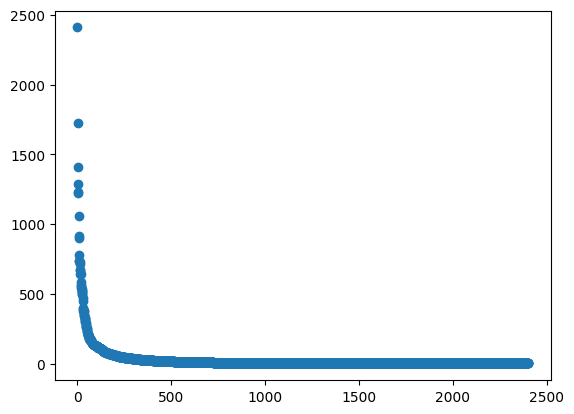

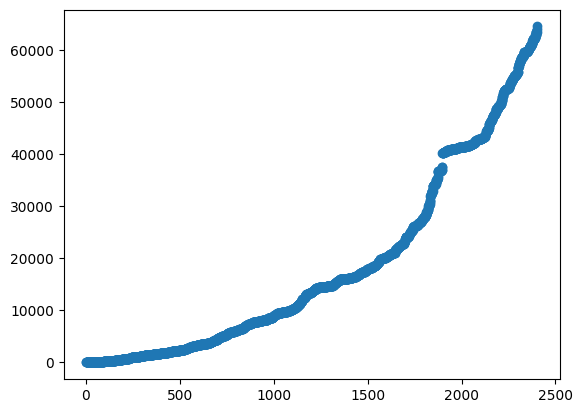

In [ ]:
# Расчёт частот слов
words2 = {}
i= 0
words_counter2= []
words_counter_x2= []
words_counter_y2= []
for token in prepared_text2:
  if token in words2:
    words2[token] += 1
  else:
    words2[token] = 1
  if not token in words_counter2:
    words_counter2.append(token)
    words_counter_x2.append(len(words_counter2))
    words_counter_y2.append(i)
  i+= 1
points_y2= sorted(list(words2.values()), reverse = True)
points_x2= list(range(0, len(points_y2)))



plt.scatter(points_x2, points_y2)
plt.show()

plt.scatter(words_counter_x2, words_counter_y2)
plt.show()


Обнаруженные локальные максимумы:


TypeError: 'NoneType' object is not subscriptable

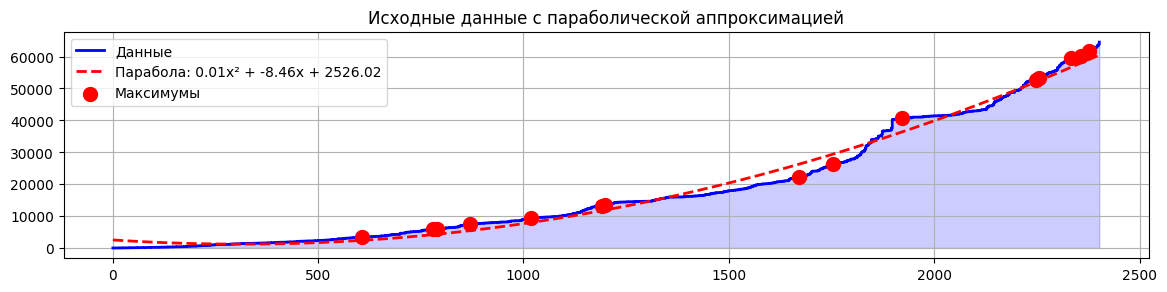

In [ ]:
result2 = find_local_maxima(words_counter_x2, words_counter_y2, window_size=50, prominence=0.8)

# Вывод результатов
# print("Параметры параболы (a, b, c):", result2['parabola_params'])
print("\nОбнаруженные локальные максимумы:")
for i, peak in enumerate(result2['local_maxima']):
  print(f"{i+1}. x={peak[0]:.2f}, y={peak[1]:.2f}, residual={peak[2]:.2f}")

In [ ]:
# Вывод: номер пика, число слов при котором пик, статья начавшаяся до пика.
for i, peak in enumerate(result2['local_maxima']):
  mas=prepared_text2[peak[1]-500:peak[1]]+prepared_text2[peak[1]:peak[1]+50]
  for j in range(len(mas)-30):
    if mas[j]=='Статья':
      print(i+1, peak[1], mas[j], mas[j+1])

TypeError: 'NoneType' object is not subscriptable